# 9. 비지도 학습
- 군집, 이상치 탐지, 밀도 추정

## 9.1 군집
- K-means Cluster 생략

### 9.1.5 군집 준지도학습
- 일부 데이터에만 레이블을 부여하여 지도학습
- 일부 데이터는 군집화를 하고 그 군집의 중심 Centroid를 골라 n개의 대표를 선정한다.
- 해당 대표 이미지에 대해서만 레이블을 진행하고, 이를 사용하여 지도학습을 진행
- 레이블 전파(label propagation)을 통해 동일 군집에 대해 레이블을 뿌려줄 수 있다.
    - 군집 자체가 정확할 순 없으므로 동일 군집내의 Centroid와 가까운 일부만 레이블을 줄 수도있다.

### 9.1.6 DBSCAN
- 밀집된 연속적 지역을 클러스터로 정의 함
- 작은 거리인 엡실론 안에 몇개의 데이터가 있는지 보고 min_samples값 보다 많이 모여있는 곳을 핵심 샘플로 한다.
- 핵심 샘플과 가까운 것들은 같은 군집이다.
- 점차 이웃을 들여다보면서 군집의 크기를 늘려나간다.
- 이웃반경 eps값과 eps내 min_samples 값을 조절하여 군집을 진행한다.
- DBSCAN은 새로운 샘플에 대해 군집 예측을 진행할 수 없다.
- 군집의 개수를 지정하지 않아도 eps와 min_samples에 의해 정해진다.
- 군집마다 밀집도가 다르다면 제대로 잡아내지 못함.

### 9.1.7 다른 군집
- 병합군집
    - 하나씩 병합하며 트리를 형성함
    
- BIRCH
    - 대규모 데이터셋을 위한 알고리즘.
    - 모든 샘플을 저장하지 않는다.

- 평균이동
    - 각 점에서 원을 그려 원안의 데이터의 평균을 구함
    - 원을 그 평균으로 이동시켜 다시 평균을 구함
    - 원이 더이상 움직이지 않을 때 까지 반복
    - DBSCAN과 비슷하지만 밀집도가 불균형할 때 더 여러가지 군집으로 쪼개지는 경향
    
- 유사도 전파
    - 자신을 대표할 수 있는 비슷한 샘플에 투표하며 각 대표와 투표한 샘플이 군집형성
    
- 스펙트럼 군집
    - 샘플 사이의 유사도 행렬을 받아 차원축소를 진행하고 축소된 차원에서 다시 군집을 진행.

## 9.2 가우시안 혼합
- 샘플이 여러 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률모델
- 하나의 가우시안 분포에서 생성된 샘플은 하나의 클러스터이다.
- 각 가우시안 분포는 일반적으로 타원형이며, 모양 크기 밀집도 방향 모든것이 다르다. 파라미터에 따라 다름
- EM알고리즘을 통해 파라미터를 초기화하고 그것이 어느 지점에 수렴할때까지 파라미터를 업데이트하며 반복 작업
- 파라미터가 지정되면 새로운 데이터가 어느군집에 속하는지 쉽게 할당할 수 있다.

In [4]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

print(
    gm.weights_,
    gm.means_,
    gm.covariances_,
    gm.converged_,
    gm.n_iter_
     )

[0.39054348 0.2093669  0.40008962] [[ 0.05224874  0.07631976]
 [ 3.40196611  1.05838748]
 [-1.40754214  1.42716873]] [[[ 0.6890309   0.79717058]
  [ 0.79717058  1.21367348]]

 [[ 1.14296668 -0.03114176]
  [-0.03114176  0.9545003 ]]

 [[ 0.63496849  0.7298512 ]
  [ 0.7298512   1.16112807]]] True 4


In [7]:
X_new, y_new = gm.sample(6)

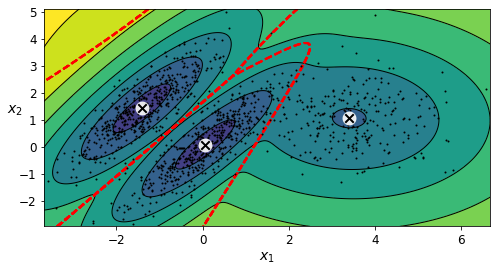

In [10]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

- covariance_type 매개변수에 따라 클러스터의 모양과 방향에 제한을 줄 수 있다.
    - spherical : 원형
    - diag : 크기와 관계없이 어떤 타원형도 가능하나 타원의 축은 좌표축과 나란함
    - tied : 모든 클러스터가 동일한 타원모양, 크기, 방향
    - full : 제약없음
    
### 9.2.1 가우시안 혼합 이상치 탐지
- 가우시안 분포에서 밀도가 낮은 영역에 속하면 이상치로 판단한다.

### 9.2.2 클러스터 개수 선택
- 가우시안 분포는 클러스터 개수를 정해야한다.
- Kmeans에서 elbow를 찾는 것과 다르게, BIC나 AIC를 최소화하는 모델을 고른다.
- $BIC = log(m)p-2log(L)$
- $AIC = 2p-2log(L)$
- m은 샘플개수, p는 파라미터 개수, L은 가능도 함수의 최대값 (최대우도)

### 9.2.3 베이즈 가우시안 혼합모델
- 불필요한 클러스터의 가중치를 0으로 수렴시켜버리는 방식
- 최초에 n_components를 최적 개수보다 크다고 믿을만한 값으로 지정하여 진행한다.

### 9.2.4 다른 알고리즘
   - PCA(inverse_transform)
       - 이상치의 재구성 오차가 아닌 것 보다 크다.
   - FastMCD
       - 데이터가 단 하나의 가우시안분포에서 유래했으며, 이 분포에서 형성되지 않은 것을 이상치로 처리
   - isolation forest
       - 데이터셋을 특성에 따라 두개로 분리하는 트리를 가지며 점차 나뉘어 모든 샘플이 하나의 가지씩으로 격리된다.
       - 이상치일 수록 멀리있는 가지에 속하며, 일찍 격리된다.
   - LOF
       - 주어진 샘플의 밀도와 이웃 주위의 밀도를 비교한다.
   - one class SVM
       - SVM으로 모든 샘플을 둘러싼 한 영역을 찾게 한다.
       - 여기에 속하지 못하는 것은 이상치이다.